# Forecasting Model Example
Basic time-series forecasting using dummy revenue data.


In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

dates = pd.date_range(start='2023-01-01', periods=12, freq='ME')
df = pd.DataFrame({
    'Date': dates,
    'Revenue': [50000, 52000, 55000, 58000, 62000, 65000, 68000, 71000, 75000, 78000, 81000, 85000]
}).set_index('Date')

df = df.asfreq('ME')

model = ARIMA(df['Revenue'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)

print("Forecasted Revenue:")
forecast

# Note: ARIMA warnings may occur on short synthetic datasets used for demonstration.



Forecasted Revenue:


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2024-01-31     88176.000586
2024-02-29     91351.742554
2024-03-31     94527.225924
2024-04-30     97702.450718
2024-05-31    100877.416957
2024-06-30    104052.124662
Freq: ME, Name: predicted_mean, dtype: float64

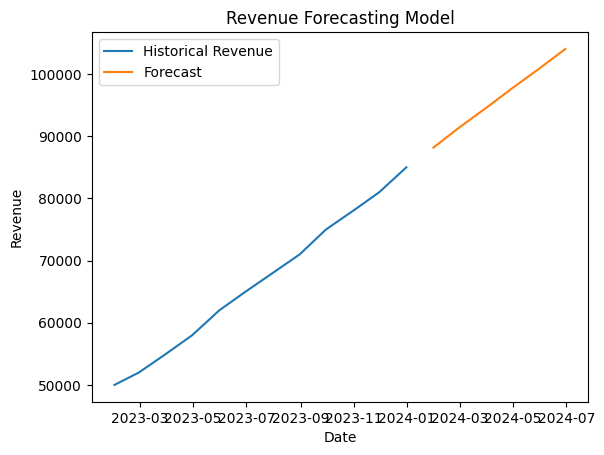

In [2]:
future_index = pd.date_range(start=df.index[-1], periods=7, freq='ME')[1:]

plt.plot(df.index, df['Revenue'], label='Historical Revenue')
plt.plot(future_index, forecast, label='Forecast')
plt.title('Revenue Forecasting Model')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.show()